In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance.

* Decision Tree is a supervised machine learning algorithm. These nodes were decided based on some parameters like Gini index, entropy, information gain

* Each node in the tree specifies a test of some attribute of the instance, and each branch descending from that node corresponds to one of the possible values for this attribute.

* An instance is classified by starting at the root node of the tree, testing the attribute specified by this node, then moving down the tree branch corresponding to the value of the attribute in the given example.

* This process is then repeated for the subtree rooted at the new node.

* In general, decision trees represent a disjunction of conjunctions of constraints on the attribute values of instances.

* Each path from the tree root to a leaf corresponds to a conjunction of attribute tests, and the tree itself to a disjunction of these conjunctions.


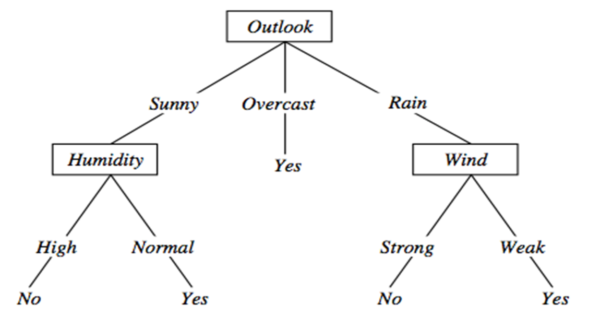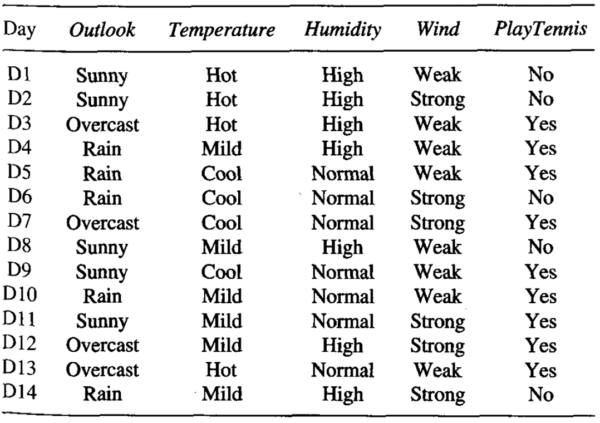

In [ ]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [ ]:
dataset.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
dataset.shape

(683, 11)

In [ ]:
# df=df.drop(['Unnamed: 0'],axis=1)
dataset['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Feature Scaling**

Feature scaling is the process of converting the data into a given range. In this case, the standard scalar technique is used.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

```
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')




In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[103   4]
 [  3  61]]


0.9590643274853801

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.96      0.97       107
           4       0.94      0.95      0.95        64

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



1. A decision tree is a flowchart-like tree structure where an internal 
node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. 

2. The topmost node in a decision tree is known as the root node. 

3. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

4. Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. 

5. The time complexity of decision trees is a function of the number of records and number of attributes in the given data.

6. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

The basic idea behind any decision tree algorithm is as follows:
* Select the best attribute using Attribute Selection Measures(ASM) to split the records.
* Make that attribute a decision node and breaks the dataset into smaller subsets.
* Starts tree building by repeating this process recursively for each child until one of the condition will match:
    1.  All the tuples belong to the same attribute value.
    2. There are no more remaining attributes.
    3. There are no more instances.


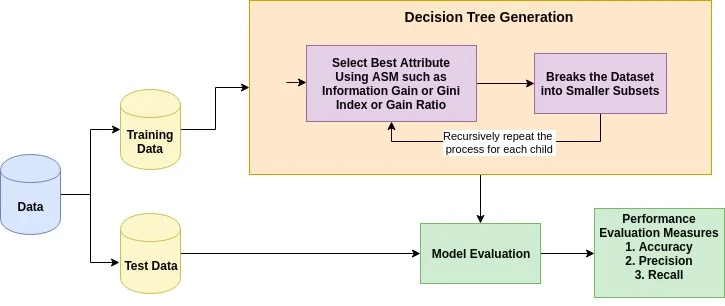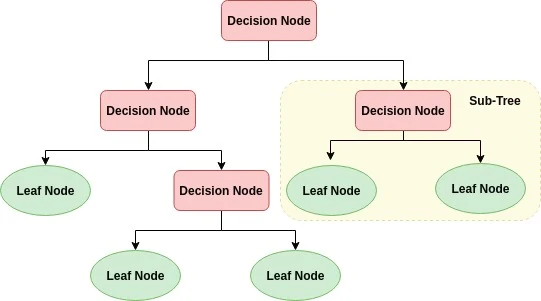

In [ ]:
df = pd.read_csv('petrol_consumption.csv')

In [ ]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df_out=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_out

,Actual,Predicted
29,534,547.0
4,410,414.0
26,577,554.0
30,571,554.0
32,577,631.0
37,704,644.0
34,487,628.0
40,587,524.0
7,467,414.0
10,580,464.0


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 54.4
Mean Squared Error: 4763.4
Root Mean Squared Error: 69.01738911317929


[Text(0.395, 0.9375, 'X[2] <= -0.207\nentropy = 0.927\nsamples = 512\nvalue = [337, 175]'),
 Text(0.08, 0.8125, 'X[6] <= 0.011\nentropy = 0.154\nsamples = 315\nvalue = [308, 7]'),
 Text(0.04, 0.6875, 'entropy = 0.0\nsamples = 299\nvalue = [299, 0]'),
 Text(0.12, 0.6875, 'X[1] <= -0.33\nentropy = 0.989\nsamples = 16\nvalue = [9, 7]'),
 Text(0.08, 0.5625, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.16, 0.5625, 'X[7] <= -0.385\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.12, 0.4375, 'X[4] <= 0.244\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.08, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16, 0.3125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2, 0.4375, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.71, 0.8125, 'X[2] <= 0.449\nentropy = 0.603\nsamples = 197\nvalue = [29, 168]'),
 Text(0.5, 0.6875, 'X[6] <= 0.011\nentropy = 0.976\nsamples = 66\nvalue = [27, 39]'),
 Text(0.32, 0.5625, 'X[8] <= -0.139\nentropy = 0.736\

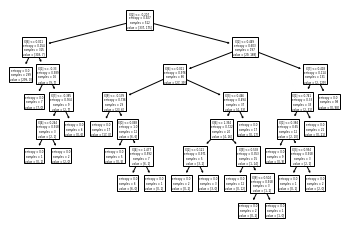

In [ ]:
from sklearn import tree
tree.plot_tree(classifier)

In [8]:
import pandas as pd
import math
import numpy as np

class Node:
    def __init__(self):
        self.children = []
        self.value = ""
        self.isLeaf = False
        self.prediction = ""

def entropy(examples):
    pos = 0.0
    neg = 0.0
    for _, row in examples.iterrows():
        if row["Class"] == "Yes":
            pos += 1
        else:
            neg += 1
    if pos == 0.0 or neg == 0.0:
        return 0.0
    else:
        p = pos / (pos + neg)
        n = neg / (pos + neg)
        return -(p * math.log(p, 2) + n * math.log(n, 2))

def info_gain(examples, attr):
    uniq = np.unique(examples[attr])
    gain = entropy(examples)
    for u in uniq:
        subdata = examples[examples[attr] == u]
        sub_e = entropy(subdata)
        gain -= (float(len(subdata)) / float(len(examples))) * sub_e
    return gain

def ID3(examples, attributes):
    root = Node()
    max_gain = 0
    max_feat = ""
    for feature in attributes:
        gain = info_gain(examples, feature)
        if gain > max_gain:
            max_gain = gain
            max_feat = feature
    root.value = max_feat
    uniq = np.unique(examples[max_feat])

    for u in uniq:
        subdata = examples[examples[max_feat] == u]
        if entropy(subdata) == 0.0:
            newNode = Node()
            newNode.isLeaf = True
            newNode.value = u
            newNode.prediction = np.unique(subdata["Class"])
            root.children.append(newNode)
        else:
            dummyNode = Node()
            dummyNode.value = u
            new_attributes = attributes.copy()
            new_attributes.remove(max_feat)
            child = ID3(subdata, new_attributes)
            dummyNode.children.append(child)
            root.children.append(dummyNode)
    return root

def printTree(root: Node, depth=0):
    for i in range(depth):
        print("\t", end="")
    print(root.value, end="")
    if root.isLeaf:
        print(" -> ", root.prediction)
    print()
    for child in root.children:
        printTree(child, depth + 1)

In [9]:
data = pd.read_excel('data.xlsx', sheet_name='Profit')
features = [features for features in data]
features.remove("Class")

root = ID3(data, features)
printTree(root)

Age
	Mid
		Competition
			No ->  ['Yes']

			Yes ->  ['No']

	New ->  ['Yes']

	Old ->  ['No']



In [12]:
data = pd.read_excel('data.xlsx', sheet_name='Tennis')
features = [features for features in data]
features.remove("Class")

root = ID3(data, features)
printTree(root)

Outlook
	Overcast ->  ['Yes']

	Rain
		Wind
			Strong ->  ['No']

			Weak ->  ['Yes']

	Sunny
		Humidity
			High ->  ['No']

			Normal ->  ['Yes']



In [14]:
data = pd.read_excel('data.xlsx', sheet_name='Class')
features = [features for features in data]
features.remove("Class")

root = ID3(data, features)
printTree(root)

a1 
	False ->  ['Yes']

	True
		a3
			High ->  ['No']

			Normal ->  ['Yes']



In [15]:
data = pd.read_excel('data.xlsx', sheet_name='Data')
features = [features for features in data]
features.remove("Class")

root = ID3(data, features)
printTree(root)

a1
	F
		a2
			F ->  ['Yes']

			T ->  ['No']

	T
		a2
			F ->  ['No']

			T ->  ['Yes']



ID3(Examples, Target_attribute, Attributes)
```
Create a Root node for the tree
If all Examples are positive, Return the single-node tree Root, with label = +
If all Examples are negative, Return the single-node tree Root, with label = -
If Attributes is empty, Return the single-node tree Root, 
with label = most common value of Target_attribute in Examples

Otherwise Begin
   A ← the attribute from Attributes that best* classifies Examples
   The decision attribute for Root ← A
   For each possible value, vi, of A,
      Add a new tree branch below Root, corresponding to the test A = vi
      Let Examples vi, be the subset of Examples that have value vi for A
      If Examples vi , is empty
         Then below this new branch add a leaf node with 
         label = most common value of Target_attribute in Examples
      Else 
         below this new branch add the subtree 
         ID3(Examples vi, Targe_tattribute, Attributes – {A}))
End
Return Root
```
The best attribute is the one with highest information gain


